In [26]:
import numpy as np
import os
#mention location of the train and test data
train_data_dir = "/content/drive/MyDrive/cnn batch size 32/v_data/train" 
test_data_dir = "/content/drive/MyDrive/cnn batch size 32/v_data/test"

In [27]:
from tensorflow.keras import backend as K
img_height, img_width = 224,224

In [28]:
K.image_data_format() #check how tensorflow is accepting the data

'channels_last'

In [29]:
#mention shape according to the tensorflow
if K.image_data_format() == "channels_first": 
    input_shape = (3,img_height,img_width)
else:
    input_shape = (img_height,img_width,3)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Dropout,Flatten,Dense

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(32,(2,2), input_shape=input_shape)) #32 = > no. of kernels , 2,2 => size of kernetl
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #pool_size = 2,2

model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
#ann
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [35]:
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size = 16,class_mode='binary')

Found 400 images belonging to 2 classes.


In [37]:
test_generator = test_datagen.flow_from_directory(test_data_dir,target_size=(img_width,img_height),batch_size = 16,class_mode='binary')

Found 100 images belonging to 2 classes.


In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy') 
model.fit_generator(
    train_generator,
    epochs = 3,
    steps_per_epoch = 400 // 16,
    validation_data=test_generator,
    validation_steps= 100 // 16
    #callbacks = [es]
)

<ipython-input-41-56284e69b1c6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/3


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 99s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.4896
Epoch 2/3
25/25 [==============================] - 27s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.4896
Epoch 3/3
25/25 [==============================] - 27s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.4896


In [42]:
400 // 32

12

In [43]:
from tensorflow.keras.preprocessing.image import load_img

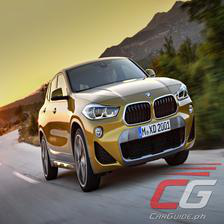

In [46]:
image = load_img("/content/drive/MyDrive/cnn batch size 32/v_data/test/cars/13.jpg")
image

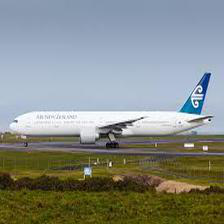

In [48]:
image = load_img("/content/drive/MyDrive/cnn batch size 32/v_data/test/planes/33.jpg")
image

In [52]:
import numpy as np
img_array = np.array(image)
img_array[:5]

array([[[139, 155, 178],
        [139, 155, 178],
        [139, 155, 178],
        ...,
        [135, 151, 176],
        [135, 151, 176],
        [135, 151, 176]],

       [[139, 155, 178],
        [139, 155, 178],
        [139, 155, 178],
        ...,
        [135, 151, 176],
        [135, 151, 176],
        [135, 151, 176]],

       [[139, 155, 178],
        [139, 155, 178],
        [139, 155, 178],
        ...,
        [135, 151, 176],
        [135, 151, 176],
        [135, 151, 176]],

       [[138, 154, 177],
        [138, 154, 177],
        [138, 154, 177],
        ...,
        [135, 151, 176],
        [135, 151, 176],
        [135, 151, 176]],

       [[138, 154, 177],
        [138, 154, 177],
        [138, 154, 177],
        ...,
        [135, 151, 176],
        [135, 151, 176],
        [135, 151, 176]]], dtype=uint8)

In [53]:
img_array.shape

(224, 224, 3)

In [57]:
img_array_reshape = img_array.reshape(1,224, 224, 3)
img_array_reshape

array([[[[139, 155, 178],
         [139, 155, 178],
         [139, 155, 178],
         ...,
         [135, 151, 176],
         [135, 151, 176],
         [135, 151, 176]],

        [[139, 155, 178],
         [139, 155, 178],
         [139, 155, 178],
         ...,
         [135, 151, 176],
         [135, 151, 176],
         [135, 151, 176]],

        [[139, 155, 178],
         [139, 155, 178],
         [139, 155, 178],
         ...,
         [135, 151, 176],
         [135, 151, 176],
         [135, 151, 176]],

        ...,

        [[ 93,  83,  21],
         [ 85,  75,  14],
         [ 90,  80,  19],
         ...,
         [ 78,  68,   7],
         [ 77,  67,   6],
         [ 79,  69,   8]],

        [[ 79,  69,   8],
         [ 71,  61,   2],
         [ 76,  66,   7],
         ...,
         [ 86,  75,  19],
         [ 84,  73,  17],
         [ 84,  73,  17]],

        [[ 68,  58,   0],
         [ 60,  50,   0],
         [ 52,  41,   0],
         ...,
         [ 76,  65,  11],
        

In [58]:
img_array_reshape.shape

(1, 224, 224, 3)

In [59]:
model.predict(img_array_reshape)

1/1 [==============================] - 0s 174ms/step


array([[0.]], dtype=float32)

In [60]:
if model.predict(img_array_reshape) >= 0.5:
    print("planes")
else:
    print("cars")

1/1 [==============================] - 0s 45ms/step
cars


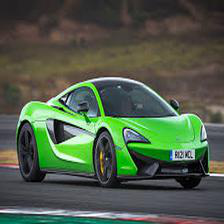

In [61]:
image = load_img("/content/drive/MyDrive/cnn batch size 32/v_data/test/cars/39.jpg")
image

In [62]:
image = load_img("/content/drive/MyDrive/cnn batch size 32/v_data/test/cars/39.jpg")
image
img_array = np.array(image)
img_array_reshape = img_array.reshape(1,224,224,3)
output = model.predict(img_array_reshape)
print(output)
if output >= 0.5:
    print("Planes")
else:
    print("car")

1/1 [==============================] - 0s 41ms/step
[[0.]]
car


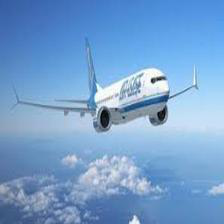

In [63]:
image1 = load_img("/content/drive/MyDrive/cnn batch size 32/v_data/test/planes/18.jpg")
image1

In [67]:
image1 = load_img("/content/drive/MyDrive/cnn batch size 32/v_data/test/planes/18.jpg")
image1
img_array = np.array(image)
img_array_reshape = img_array.reshape(1,224,224,3)
output = model.predict(img_array_reshape)
print(output)
if output >= 0.5:
    print("Planes")
else:
    print("car")

1/1 [==============================] - 0s 38ms/step
[[0.]]
Planes
